In [2]:
import pandahouse
import numpy as np
import pandas as pd
import hashlib
import seaborn as sns
import scipy.stats as stats

In [10]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [11]:
connection = {'host': 'https://clickhouse.lab.karpov.courses',
'database':'simulator_20230820',
'user':'student',
'password':'dpo_python_2020'
}

In [12]:
q = """
SELECT exp_group, 
    user_id,
    sum(action = 'like') as likes,
    sum(action = 'view') as views,
    likes/views as ctr
FROM {db}.feed_actions 
WHERE toDate(time) between '2023-07-23' and '2023-07-29'
    and exp_group in (2,3)
GROUP BY exp_group, user_id
"""

df = pandahouse.read_clickhouse(q, connection=connection)


In [13]:
count=0
p_values=np.zeros(10000)
for i in range(10000):
    df2=df.loc[df['exp_group'] == 2].sample(500,replace=False).copy().reset_index()
    df3=df.loc[df['exp_group'] == 3].sample(500,replace=False).copy().reset_index()
    p_value=stats.ttest_ind(df2.ctr,df3.ctr,equal_var=False)[1]
    p_values[i]=p_value
    if p_value<=0.05:
        count+=1

<font size="12">Гистограмма распределления p-values </font>

<Axes: ylabel='Count'>

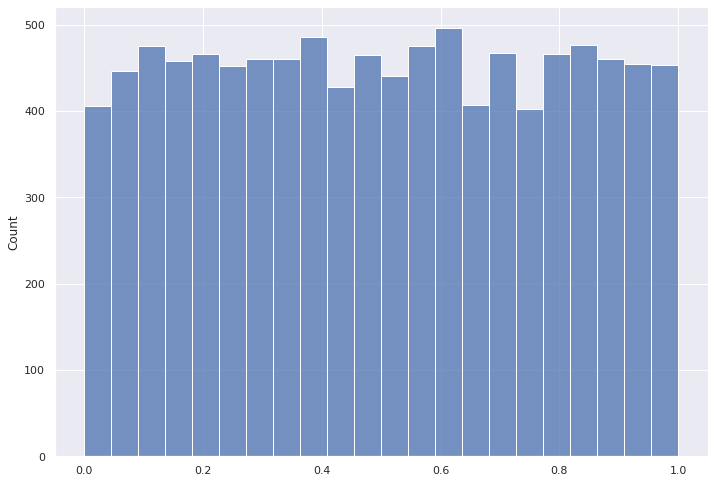

In [14]:
sns.histplot(p_values)

In [18]:
print("Процент p-values<=0.05:",count/100,"%")

Процент p-values<=0.05: 4.43 %


<font size="4">Вывод: По результатам симуляции из 10000 AA тестов видно, что статистически значемые различия наблюдаются только в 4.43% случаев, те меньше 5%. Система сплитования работает корректно  </font>